In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from mpl_toolkits.mplot3d import Axes3D

In [14]:
def generate_ball(center, radius, n_points):
    u = np.random.uniform(0, 2 * np.pi, n_points)
    v = np.random.uniform(0, np.pi, n_points)
    x = radius * np.cos(u) * np.sin(v) + center[0]
    y = radius * np.sin(u) * np.sin(v) + center[1]
    z = radius * np.cos(v) + center[2]
    return np.column_stack((x, y, z))

In [15]:
def generate_ellipsoid(center, radii, rotation_matrix, n_points):
    phi = np.random.uniform(0, 2 * np.pi, n_points)
    theta = np.random.uniform(0, np.pi, n_points)
    x = radii[0] * np.cos(phi) * np.sin(theta)
    y = radii[1] * np.sin(phi) * np.sin(theta)
    z = radii[2] * np.cos(theta)
    points = np.column_stack((x, y, z)) @ rotation_matrix.T + center
    return points

In [16]:
def apply_gmm(X, n_clusters):
    gmm = GaussianMixture(n_components=n_clusters, random_state=66)
    labels = gmm.fit_predict(X)
    return labels

In [17]:
def plot_clusters(X, labels, title):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels, cmap='viridis', alpha=0.7)
    ax.set_title(title)
    plt.show()

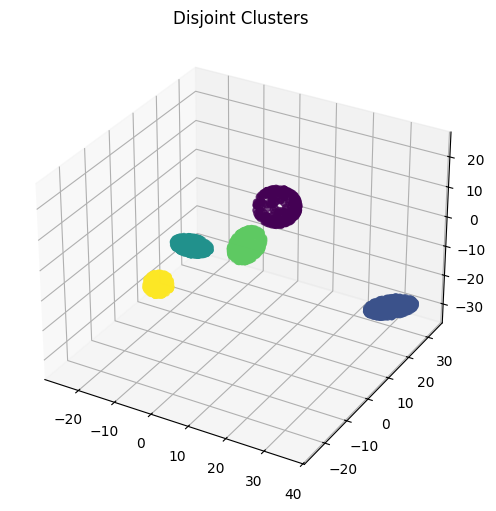

In [18]:
# Part (a): Disjoint clusters
np.random.seed(42)
ball1 = generate_ball(center=[-10, -10, -10], radius=3, n_points=200)
ball2 = generate_ball(center=[10, 10, 10], radius=5, n_points=300)
ellipsoid1 = generate_ellipsoid(center=[-20, 20, -20], radii=[5, 3, 2], rotation_matrix=np.eye(3), n_points=300)
ellipsoid2 = generate_ellipsoid(center=[20, -20, 20], radii=[3, 5, 4], rotation_matrix=np.eye(3), n_points=300)
ellipsoid3 = generate_ellipsoid(center=[30, 30, -30], radii=[6, 2, 3], rotation_matrix=np.random.rand(3, 3), n_points=400)
X_disjoint = np.vstack([ball1, ball2, ellipsoid1, ellipsoid2, ellipsoid3])
labels_disjoint = apply_gmm(X_disjoint, n_clusters=5)
plot_clusters(X_disjoint, labels_disjoint, "Disjoint Clusters")

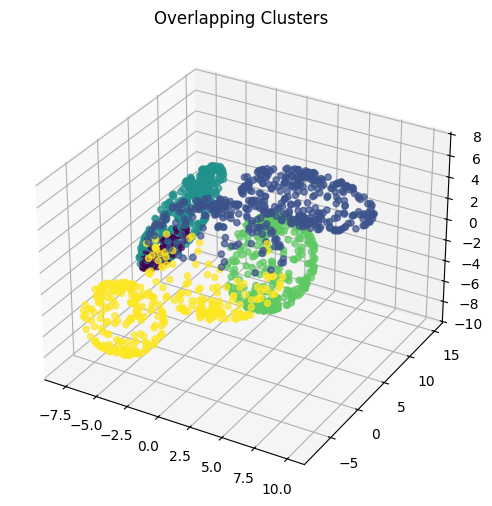

In [19]:
# Part (b): Overlapping clusters
ball1 = generate_ball(center=[-5, -5, -5], radius=3, n_points=200)
ball2 = generate_ball(center=[0, 0, 0], radius=5, n_points=300)
ellipsoid1 = generate_ellipsoid(center=[5, 5, 5], radii=[5, 3, 2], rotation_matrix=np.eye(3), n_points=300)
ellipsoid2 = generate_ellipsoid(center=[0, 10, -5], radii=[3, 5, 4], rotation_matrix=np.eye(3), n_points=300)
ellipsoid3 = generate_ellipsoid(center=[-5, 5, 0], radii=[6, 2, 3], rotation_matrix=np.random.rand(3, 3), n_points=400)
X_overlap = np.vstack([ball1, ball2, ellipsoid1, ellipsoid2, ellipsoid3])
labels_overlap = apply_gmm(X_overlap, n_clusters=5)
plot_clusters(X_overlap, labels_overlap, "Overlapping Clusters")